In [1]:
# Networks
import networkx as nx
import QNET

# Utilities
import numpy as np
import random
import array
import copy

#Plot functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import art3d

# Animations
import matplotlib.animation as animation
from IPython.display import HTML

# Interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Sample graphs
from Graph1 import X as X1
from Graph2 import X as X2

In [41]:
def get_data(G, tMax, dt):
    Q = copy.deepcopy(G)
    """
    Generates the positions in Qnode over time
    # In future, maybe want to generate cost as well?
    
    Args:
        Q (Qnet): Qnet graph
        dt (float): Time increment
        tMax (float): Maximum time
        
    Returns:
        list: list of qnode positions over time
    """
    
    data = []
    
    i = 0
    while i * dt < tMax:
        
        # initialise list of coordinates for timestep
        coord_list = []
        
        # Get node data and append it to coord_list
        for node in Q:
            coords = copy.copy(node.coords)
            coord_list.append(coords)
        
        # Append coord list to data and increment time
        data.append(coord_list)
        
        Q.update(dt)
        i += 1
        
    return data

In [44]:
## Debug get_data
tMax = 2
dt = 1
data = get_data(X2, tMax, dt)
print(data)

print(data[0][0][0])
print(data[0][0][1])
print(data[0][0][2])

[[[50, 0, 0], [250, 0, 0], [100, 0, 0], [200, 0, 0], [150, 0, 0], [0, 0, 100]], [[50, 0, 0], [250, 0, 0], [100, 0, 0], [200, 0, 0], [150, 0, 0], [30, 0, 100]]]
50
0
0


In [19]:
def animate(i, data, scatters, lines):
    """
    Update data for scatters and lines
    This function is passed in as an argument for FuncAnimation
    
    Args:
        i (int): Iteration number
        data (list): Data passed in from get_data
        scatters: Scatter objects
        lines: Line objects
    """
    
    # Offset points
    for j in range(len(scatters)):
        scatters[j]._offsets3d = (data[i][j][0], data[i][j][1], data[i][j][2])
    
    # "Scatter function of matplotlib expects object with len and not
    # number?""
    
    return scatters
    # Redraw lines

[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[3.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[6.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[9.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[12.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[15.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[18.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[21.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[24.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[27.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[30.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[33.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[36.0, 0.0, 100]


[50, 0, 0]
[250, 0, 0]
[100, 0, 0]
[200, 0, 0]
[150, 0, 0]
[39.0, 0

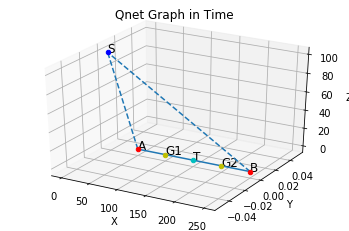

In [27]:
"""
Initialize Qnet data:
"""

def Qnet3dAnim(G, tMax, dt):
    
    Q = copy.deepcopy(G)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    scatters = []
    lines = []

    # Initialize scatters
    for node in Q.nodes:
        x = node.coords[0]
        y = node.coords[1]
        z = node.coords[2]
    
        # Dictionary between colours and node types
        qnode_color = {QNET.Qnode:'r', QNET.Ground:'y', QNET.Swapper:'c', QNET.Satellite:'b'}
        
        new_scatter = ax.scatter(x, y, z, c = qnode_color[type(node)], marker = 'o')
        ax.text(x, y, z, '%s' % node.name, size=12, zorder=1)
    
        scatters.append(new_scatter)

    # Initialize lines
    for edge in X2.edges:
        xs = [edge[0].coords[0], edge[1].coords[0]]
        ys = [edge[0].coords[1], edge[1].coords[1]]
        zs = [edge[0].coords[2], edge[1].coords[2]]
    
        # TODO: Label lines with costs
        
        if (isinstance(edge[0], QNET.Satellite) or isinstance(edge[1], QNET.Satellite)):
            line = art3d.Line3D(xs, ys, zs, linestyle = '--')
        else:
            line = art3d.Line3D(xs, ys, zs)
        
        lines.append(line)
        ax.add_line(line)
        
    # Get data for Qnet over time
    data = get_data(Q, tMax, dt)
        
    # Number of iterations
    i = len(data)
        
    # Set axis properties
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Qnet Graph in Time')
    
    # Get animation
    """
    matplotlib.animation.FuncAnimation(fig, func, frames=None,
                                    init_func=None, fargs=None, 
                                    save_count=None, *, cache_frame_data=True, 
                                    **kwargs)
    """
    
    anim = animation.FuncAnimation(fig, animate, i, fargs=(data, scatters, lines), interval=100, blit=False, repeat=True)
    # From animation generate video
    # HTML(anim.to_html5_video())
    # HTML(anim.to_jshtml())
    
    # DEBUGS
    
import QNET
from Graph2 import X
Qnet3dAnim(X, tMax = 10, dt = 0.1)